# Red bipartita de usuarios y palabras

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import powerlaw
%matplotlib inline
sns.set()

## Número de nodos y enlaces

In [7]:
all_edges = []
with open('edges_file_total_network_weights_undirected_2.txt', encoding="utf8") as f:
    next(f)
    for line in f:
        edge = line.replace('\n','').split('\t')
        all_edges.append((edge[0],edge[1]))

total_count_edges = len(all_edges)
all_nodes = set()
users_nodes = set()
words_nodes = set()

for x,y in all_edges:
    users_nodes.add(x)
    words_nodes.add(y)
    all_nodes.add(x)
    all_nodes.add(y)
    
print("Total de enlaces:", len(all_edges))
print("Total de nodos:", len(all_nodes))
print("Total de nodos usuario:", len(users_nodes))
print("Total de nodos de palabras:", len(words_nodes))

Total de enlaces: 35708
Total de nodos: 15434
Total de nodos usuario: 3003
Total de nodos de palabras: 12431


## Proyecciones

In [6]:
projection_users = []
projection_words = []
for word in words_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if word in edge:
            possible_nodes.add(edge[0])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_users and (node2,node1) not in projection_users:
                projection_users.append((node1,node2)) if (node1 != node2) else 0
                
for user in users_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if user in edge:
            possible_nodes.add(edge[1])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_words and (node2,node1) not in projection_words:
                projection_words.append((node1,node2)) if (node1 != node2) else 0
                
print("Proyeccion usuarios total enlaces:",len(projection_users))
print("Proyeccion palabras total enlaces:",len(projection_words))

KeyboardInterrupt: 

## Proyecciones usando NetworkX

In [4]:
tweets_users_words_graph = nx.Graph()
tweets_users_words_graph.add_nodes_from(users_nodes, bipartite=0)
tweets_users_words_graph.add_nodes_from(words_nodes, bipartite=1)
tweets_users_words_graph.add_edges_from(all_edges)

projected_graph_users = bipartite.projected_graph(tweets_users_words_graph, users_nodes)
projected_graph_words = bipartite.projected_graph(tweets_users_words_graph, words_nodes)

print("Proyeccion grafo usuarios total enlaces:",len(projected_graph_users.edges()))
print("Proyeccion grafo palabras total enlaces:",len(projected_graph_words.edges()))

Proyeccion grafo usuarios total enlaces: 260852
Proyeccion grafo palabras total enlaces: 460130


## Distribución de grados para la red bipartita completa

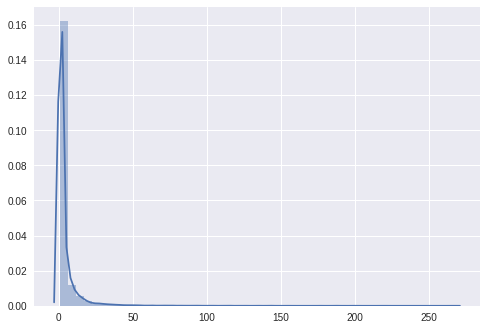

In [6]:
degrees_tweets_users_words_graph = list(tweets_users_words_graph.degree().values())
sns.distplot(degrees_tweets_users_words_graph)

## Distribución de grados para la red proyectada de usuarios

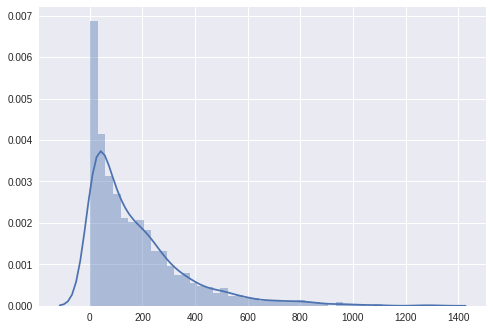

In [7]:
degrees_projected_graph_users = list(projected_graph_users.degree().values())
degrees_projected_graph_users = np.array(degrees_projected_graph_users)
degrees_projected_graph_users = degrees_projected_graph_users[np.nonzero(degrees_projected_graph_users)]
sns.distplot(degrees_projected_graph_users)

## Distribución de grados para la red proyectada de palabras

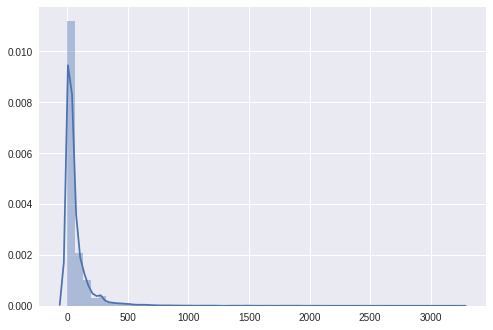

In [8]:
degrees_projected_graph_words = list(projected_graph_words.degree().values())
degrees_projected_graph_words = np.array(degrees_projected_graph_words)
degrees_projected_graph_words = degrees_projected_graph_words[np.nonzero(degrees_projected_graph_words)]
sns.distplot(degrees_projected_graph_words)

## Power Law Distribution para la red bipartita completa

(0.30575224789226124, 0.99999999999999989, 397.58427379755062)

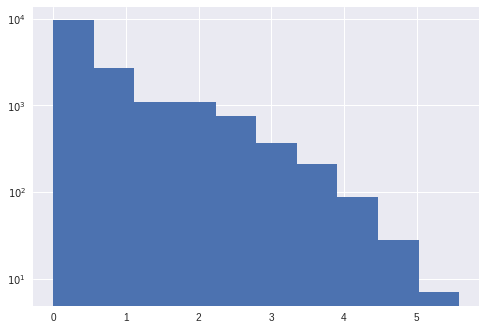

In [9]:
logs_tweets_users_words_graph = np.log(degrees_tweets_users_words_graph)
plt.hist(logs_tweets_users_words_graph, log=True)

e, l, s = powerlaw.fit(degrees_tweets_users_words_graph)
e, l, s

## Power Law Distribution para la red proyectada de usuarios

(0.40136040358609915, 0.99999999999999978, 1345.7514635819489)

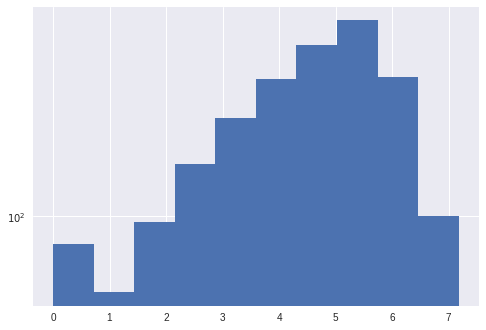

In [10]:
logs_projected_graph_users = np.log(degrees_projected_graph_users)
plt.hist(logs_projected_graph_users, log=True)

e_users, l_users, s_users = powerlaw.fit(degrees_projected_graph_users)
e_users, l_users, s_users

## Power Law Distribution para la red proyectada de palabras

(0.19384867451653767, 0.99999999999999978, 4638.6813962276701)

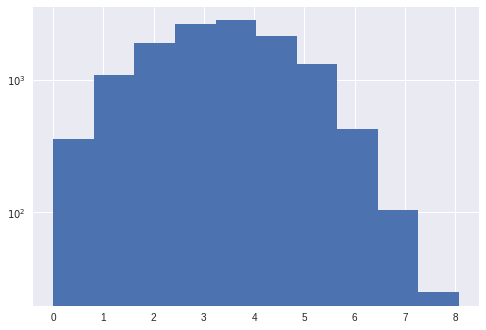

In [11]:
logs_projected_graph_words = np.log(degrees_projected_graph_words)
plt.hist(logs_projected_graph_words, log=True)

e_words, l_words, s_words = powerlaw.fit(degrees_projected_graph_words)
e_words, l_words, s_words

## Average path length de la red de palabras y usuarios y proyecciones

In [16]:
tweets_users_words_components = sorted(nx.connected_component_subgraphs(tweets_users_words_graph), key = len, reverse=True)
giant_component = tweets_users_words_components[0]
giant_component_edges = giant_component.edges()
# giant_component_diameter = nx.diameter(giant_component) #= 13
# giant_component_avg_shortest_path = nx.average_shortest_path_length(giant_component)
print("Componentes de la red de palabras y usuarios:",len(tweets_users_words_components))
print("Enlaces del componente gigante de la red de usuarios y palabras:", len(giant_component_edges))
print("Diametro del componente gigante de la red de usuarios y palabras:", giant_component_diameter)
print("Avg shortest path del componente gigante de la red de usuarios y palabras:", giant_component_avg_shortest_path)
print(" ")

# giant_component_edges_file = open('giant_component_edges_file.txt', 'w')
# print('Source\tTarget\tType', file=giant_component_edges_file)
# for k, v in sorted(giant_component_edges):
#     print(k+'\t'+v+'\tUndirected', file=giant_component_edges_file)
    

# print(nx.average_shortest_path_length(giant_component)) = 5.098959450209508
# for component in tweets_users_words_components:
#     print(len(component))

projected_graph_users_components = sorted(nx.connected_component_subgraphs(projected_graph_users), key = len, reverse=True)
print("Componentes de la proyección de usuarios:", len(projected_graph_users_components))
giant_component_users = projected_graph_users_components[0]
giant_component_users_edges = giant_component_users.edges()
# giant_component_users_avg_shortest_path = nx.average_shortest_path_length(giant_component_users)
# giant_component_users_diameter = nx.diameter(giant_component_users)
print("Enlaces del componente gigante de la red de usuarios:", len(giant_component_users_edges))
print("Diametro del componente gigante de la red de usuarios:", giant_component_users_diameter)
print("Avg shortest path del componente gigante de la red de usuarios:", giant_component_users_avg_shortest_path)
print(" ")


projected_graph_words_components = sorted(nx.connected_component_subgraphs(projected_graph_words), key = len, reverse=True)
print("Componentes de la proyección de palabras:", len(projected_graph_words_components))
giant_component_words = projected_graph_words_components[0]
giant_component_words_edges = giant_component_words.edges()
# giant_component_words_avg_shortest_path = nx.average_shortest_path_length(giant_component_words)
# giant_component_words_diameter = nx.diameter(giant_component_words)
print("Enlaces del componente gigante de la red de palabras:", len(giant_component_words_edges))
print("Diametro del componente gigante de la red de palabras:", giant_component_words_diameter)
print("Avg shortest path del componente gigante de la red de palabras:", giant_component_words_avg_shortest_path)

Componentes de la red de palabras y usuarios: 125
Enlaces del componente gigante de la red de usuarios y palabras: 31685
Diametro del componente gigante de la red de usuarios y palabras: 13
Avg shortest path del componente gigante de la red de usuarios y palabras: 5.098959450209508
 
Componentes de la proyección de usuarios: 125
Enlaces del componente gigante de la red de usuarios: 260850
Diametro del componente gigante de la red de usuarios: 6
Avg shortest path del componente gigante de la red de usuarios: 2.10614504622125
 
Componentes de la proyección de palabras: 125
Enlaces del componente gigante de la red de palabras: 459216
Diametro del componente gigante de la red de palabras: 6
Avg shortest path del componente gigante de la red de palabras: 2.643181597626508


## Coeficiente de Clustering

In [35]:
avg_clustering_tweets_users_words_graph = nx.average_clustering(tweets_users_words_graph)
print("Promedio del coeficiente de clustering de la red de usuarios y palabras:", avg_clustering_tweets_users_words_graph)

avg_clustering_projected_graph_users = nx.average_clustering(projected_graph_users)
print("Promedio del coeficiente de clustering de la red de usuarios:", avg_clustering_projected_graph_users)
N_users = len(projected_graph_users.nodes())
edges_user = projected_graph_users.edges()
p_users = (2*len(edges_user))/(N_users*(N_users-1))
random_graph_users = nx.gnp_random_graph(N_users,p_users)
avg_clustering_random_graph_users = nx.average_clustering(random_graph_users)
print("Promedio del coeficiente de clustering de la red aleatoria de usuarios:", avg_clustering_random_graph_users)

avg_clustering_projected_graph_words = nx.average_clustering(projected_graph_words)
print("Promedio del coeficiente de clustering de la red de palabras:", avg_clustering_projected_graph_words)
N_words = len(projected_graph_words.nodes())
edges_words = projected_graph_words.edges()
p_words = (2*len(edges_words))/(N_words*(N_words-1))
random_graph_words = nx.gnp_random_graph(N_words,p_words)
avg_clustering_random_graph_words = nx.average_clustering(random_graph_words)
print("Promedio del coeficiente de clustering de la red aleatoria de palabras:", avg_clustering_random_graph_words)

Promedio del coeficiente de clustering de la red de usuarios y palabras: 0.0
Promedio del coeficiente de clustering de la red de usuarios: 0.5772418901565632
Promedio del coeficiente de clustering de la red aleatoria de usuarios: 0.05742917398388801
Promedio del coeficiente de clustering de la red de palabras: 0.8540640763704914
Promedio del coeficiente de clustering de la red aleatoria de palabras: 0.005556848386865481


## K-cores palabras y usuarios

In [43]:
giant_component_words_k_cores = nx.k_core(giant_component_words)
print(len(giant_component_words_k_cores.edges()))
nx.write_gexf(giant_component_words_k_cores, "giant_component_words_k_cores.gexf")

35511


## Archivos con las redes

In [39]:
def export_network_file(network_edges, file_name):
    network_edges_file = open(file_name, 'w')
    print('Source\tTarget\tType', file=network_edges_file)
    for k, v in sorted(network_edges):
        print(k+'\t'+v+'\tUndirected', file=network_edges_file)

export_network_file(giant_component_users_edges, 'giant_component_users_edges_file.txt')
export_network_file(giant_component_words_edges, 'giant_component_words_edges_file.txt')